# Q1 Sobel

## a)

In [2]:
# generate random matrix with size n*n
import numpy as np
import math
def generateRandomMatrix(n):
  return np.random.randint(0 , 255 , (n , n))  

In [3]:
# write convolution function
def convolve(matrix, kernel):
  #define result matrix
  res = np.zeros((len(matrix) - len(kernel) + 1 , len(matrix) - len(kernel) + 1))

  #calculate conv for each part of matrix
  for t in range(len(matrix) - len(kernel) - 1):
    for p in range(len(matrix) - len(kernel) - 1):
      #a part of the matrix to conv with kernel
      hold = matrix[t : t + len(kernel) , p : p + len(kernel)]
      res[t , p] = np.sum(np.multiply(hold , kernel))
  return res
  

In [4]:
# generate horizontal and vertical kernels
horizontal = [[-1, 0 , 1] , [-2 , 0 , 2] , [-1 , 0 , 1]]
vertical = [[-1, -2 , -1] , [0 , 0 , 0] , [1 , 2 , 1]]

In [5]:
# convolve the initial matrix with kernels
initial_matrix = generateRandomMatrix(10)
conv_horizontal = convolve(initial_matrix , horizontal)
conv_vertical = convolve(initial_matrix , vertical)

In [6]:
# generate magnitude and direction matrixes
h2 = np.linalg.matrix_power(conv_horizontal , 2)
v2 = np.linalg.matrix_power(conv_vertical , 2)
M = np.sqrt(h2 + v2)
alpha = np.arctan2(conv_vertical , conv_horizontal)

<ipython-input-6-eb2b1cc8b4d6>:4: RuntimeWarning: invalid value encountered in sqrt
  M = np.sqrt(h2 + v2)


## b)

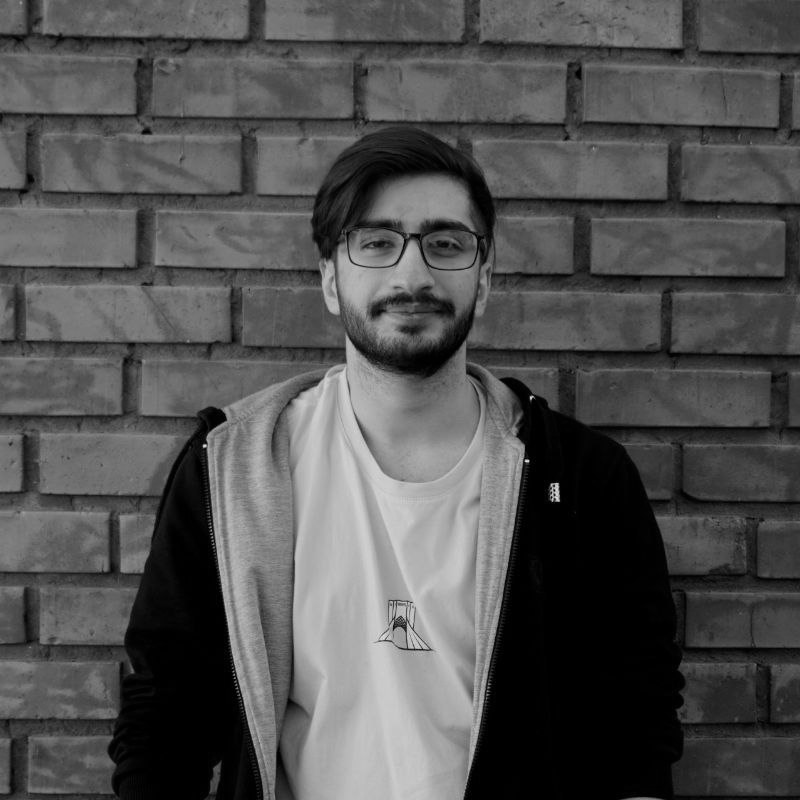

In [7]:
# load image and convert it to gray scale
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2
my_image = cv2.imread('afshin.jpg')
gray_image = cv2.cvtColor(my_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

In [14]:
# define gaussian kernel
gaussian_kernel = np.array([[0.3679 , 0.6065 , 0.3679] , [0.6065 , 1 , 0.6065] , [0.3679 , 0.6065 , 0.3679]]) / 4.8976


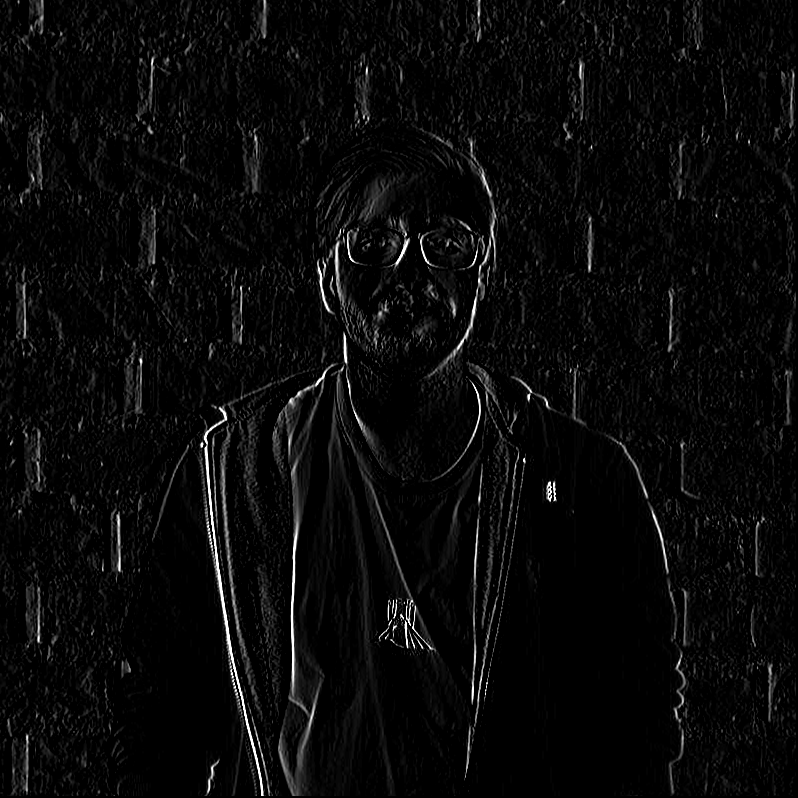

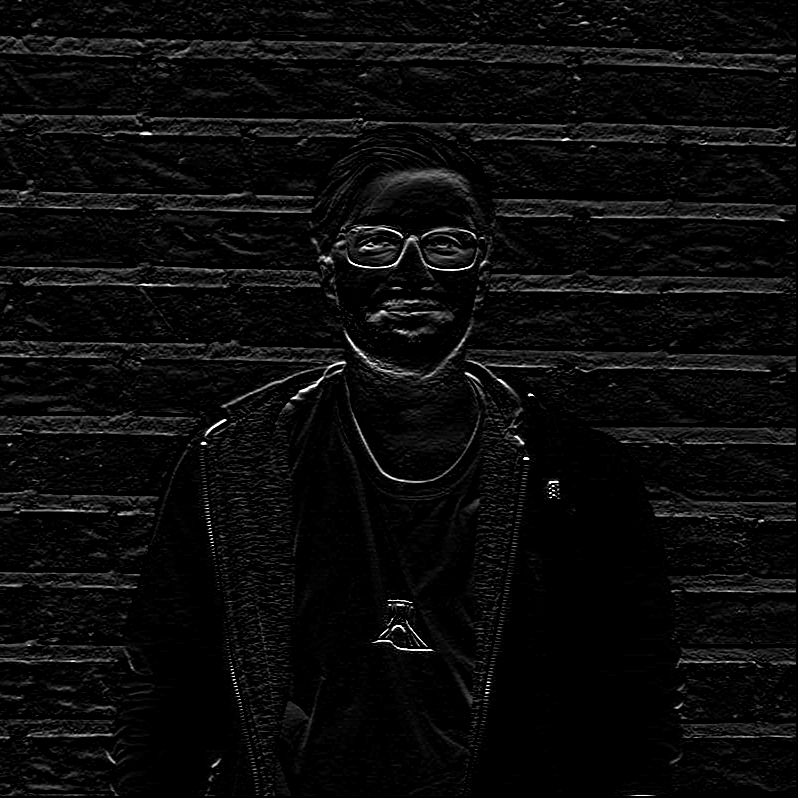

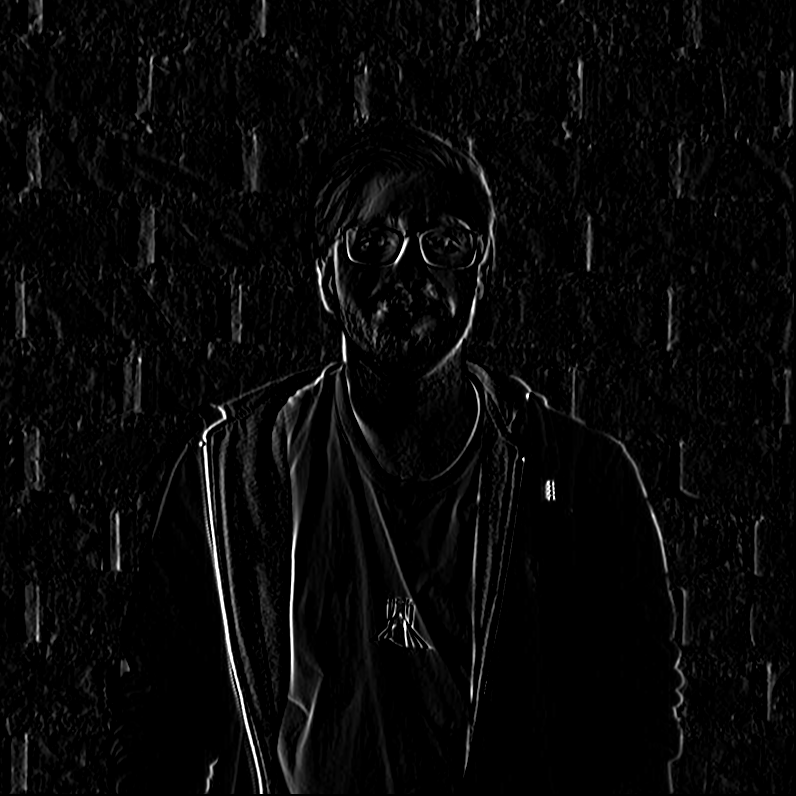

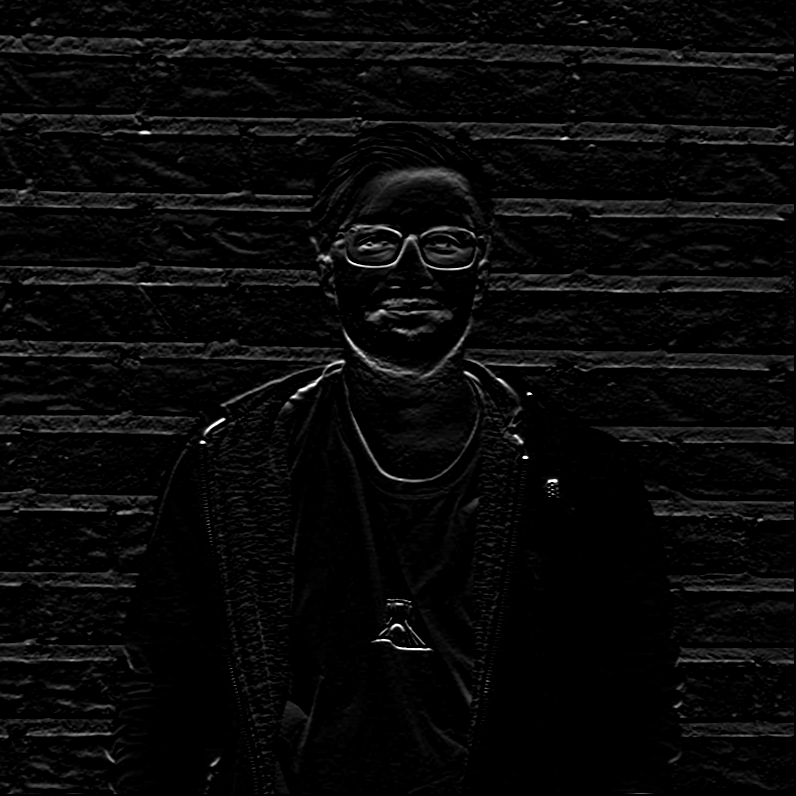

In [15]:
# generate Sobel outputs for 2 cases with gaussion filter and without gaussion filter and compare them
p1_horizontal = convolve(gray_image , horizontal)
p1_vertical = convolve(gray_image , vertical)

p2_horizontal = convolve(convolve(gray_image , gaussian_kernel) , horizontal)
p2_vertical = convolve(convolve(gray_image , gaussian_kernel), vertical)

cv2_imshow(p1_horizontal)
cv2_imshow(p1_vertical)
cv2_imshow(p2_horizontal)
cv2_imshow(p2_vertical)


In [10]:
mag = np.sqrt(p1_horizontal**2 + p1_vertical **2)
grad = np.arctan2(p1_vertical , p1_horizontal) / np.pi * 180

## c)

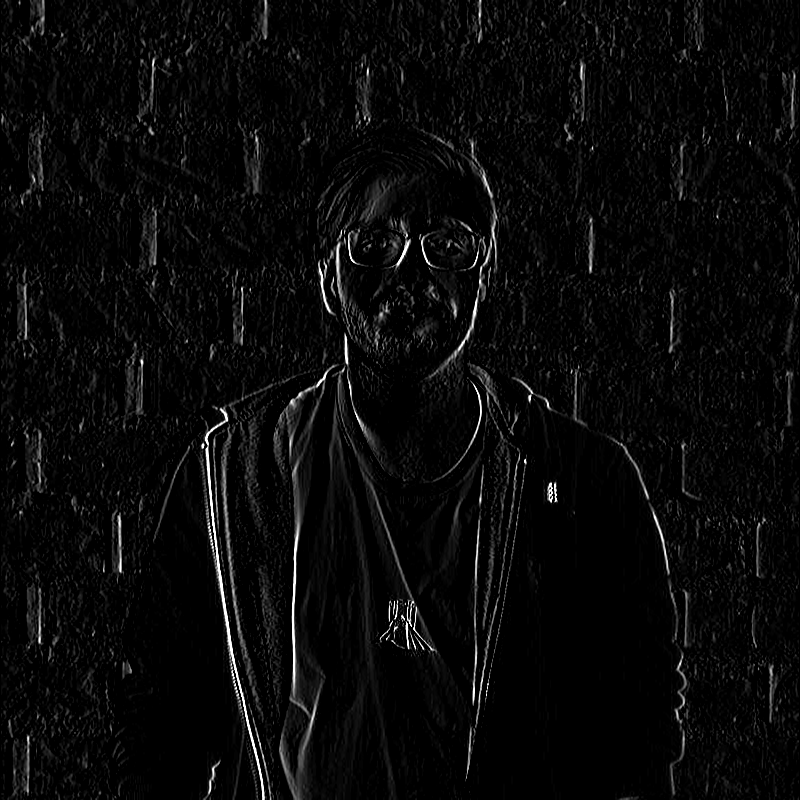

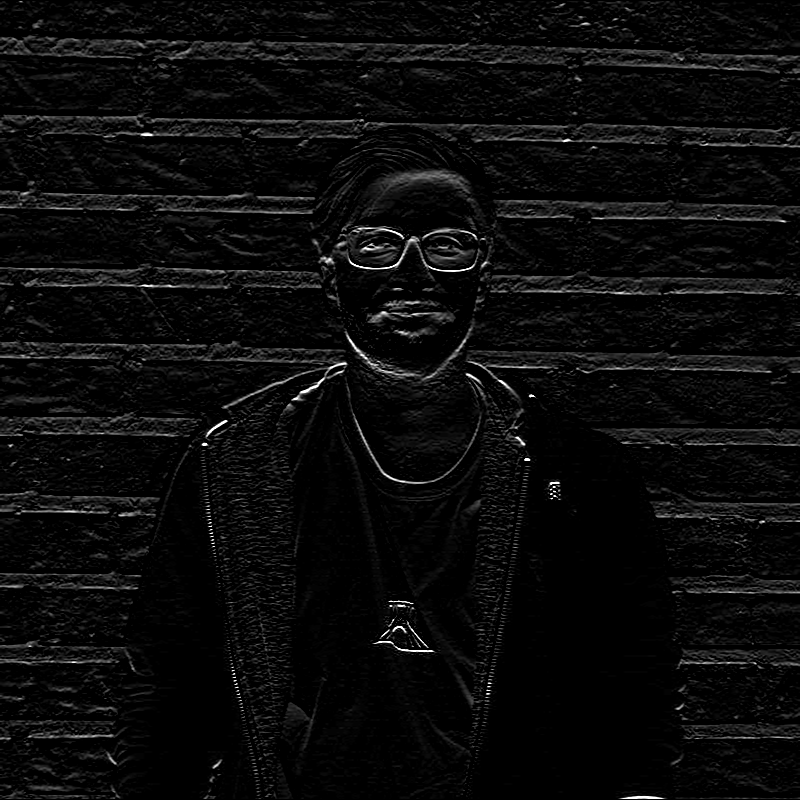

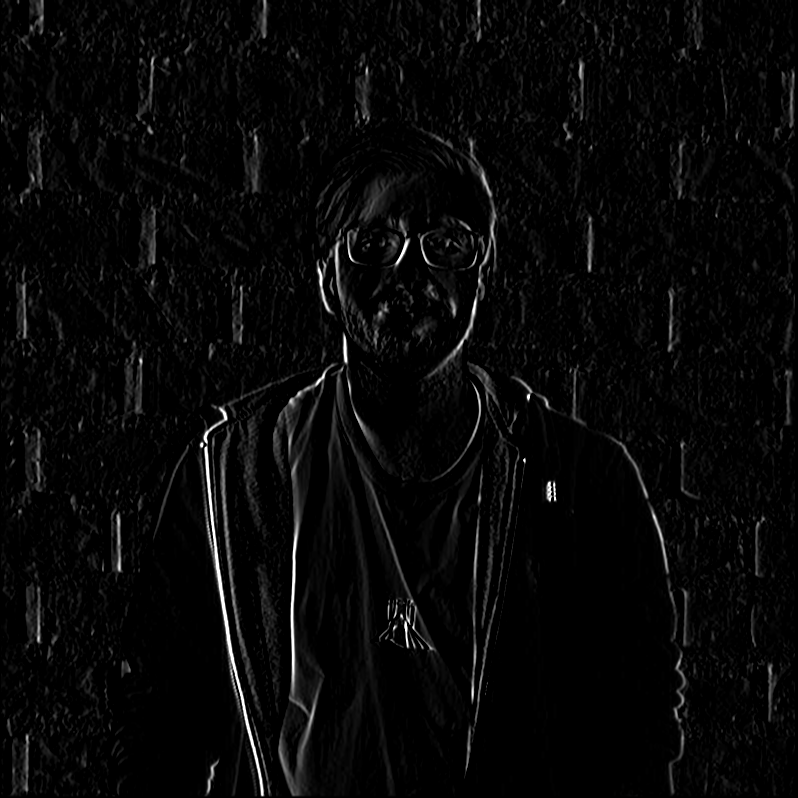

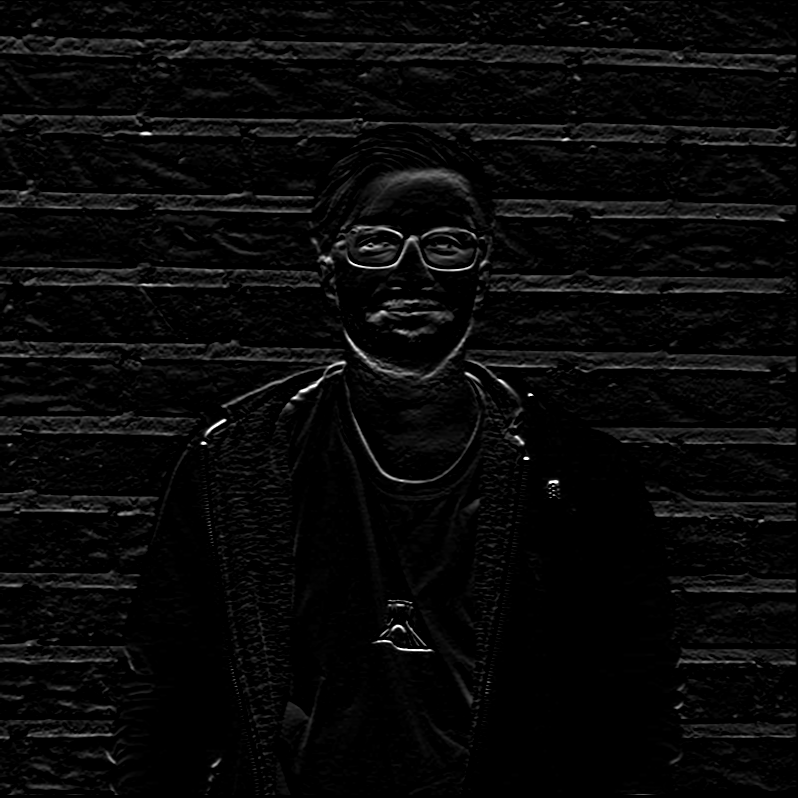

In [16]:
# do the operations in part b with OpenCV Sobel method and describe its parameters
p1_sobelx = cv2.Sobel(gray_image ,cv2.CV_8U , 1 , 0, ksize=3)
p1_sobely = cv2.Sobel(gray_image ,cv2.CV_8U , 0 , 1, ksize=3)

p2_sobelx = cv2.Sobel(convolve(gray_image , gaussian_kernel) ,cv2.CV_64F, 1 , 0, ksize=3)
p2_sobely = cv2.Sobel(convolve(gray_image , gaussian_kernel) ,cv2.CV_64F, 0 , 1, ksize=3)


cv2_imshow(p1_sobelx)
cv2_imshow(p1_sobely)
cv2_imshow(p2_sobelx)
cv2_imshow(p2_sobely)
